In [1]:
#EDA

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Bundesliga_Results.csv")
df.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
7645,D1,12/5/2018,Hoffenheim,Dortmund,3,1,H,1.0,0.0,H,2017-18
7646,D1,12/5/2018,Leverkusen,Hannover,3,2,H,2.0,0.0,H,2017-18
7647,D1,12/5/2018,Mainz,Werder Bremen,1,2,A,1.0,1.0,D,2017-18
7648,D1,12/5/2018,Schalke 04,Ein Frankfurt,1,0,H,1.0,0.0,H,2017-18
7649,D1,12/5/2018,Wolfsburg,FC Koln,4,1,H,1.0,1.0,D,2017-18


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 612 to 7649
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       7038 non-null   object 
 1   Date      7038 non-null   object 
 2   HomeTeam  7038 non-null   object 
 3   AwayTeam  7038 non-null   object 
 4   FTHG      7038 non-null   int64  
 5   FTAG      7038 non-null   int64  
 6   FTR       7038 non-null   object 
 7   HTHG      7038 non-null   float64
 8   HTAG      7038 non-null   float64
 9   HTR       7038 non-null   object 
 10  Season    7038 non-null   object 
 11  H         7038 non-null   object 
 12  A         7038 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 769.8+ KB


In [16]:
df.shape

(7038, 13)

In [18]:
df.isna().sum()

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Season      0
H           0
A           0
dtype: int64

In [19]:
df["FTR"].value_counts()

H    3288
A    1955
D    1795
Name: FTR, dtype: int64

Text(0, 0.5, 'Count')

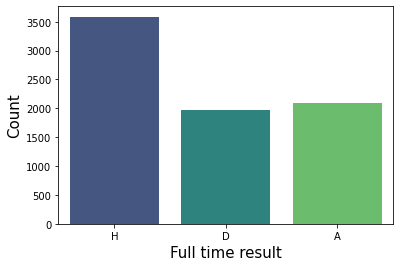

In [5]:
sns.countplot(data=df, x="FTR", palette='viridis',)
plt.xlabel("Full time result", size=15, color="Black")
plt.ylabel("Count", size=15, color="Black")

In [6]:
#H: Home team
#D: Draw
#A: Away team

#Observation:
#The home team wins by far the most number of games. 

In [6]:
df['total_goals'] = df['FTAG'] + df['FTHG']
df.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,total_goals
7645,D1,12/5/2018,Hoffenheim,Dortmund,3,1,H,1.0,0.0,H,2017-18,4
7646,D1,12/5/2018,Leverkusen,Hannover,3,2,H,2.0,0.0,H,2017-18,5
7647,D1,12/5/2018,Mainz,Werder Bremen,1,2,A,1.0,1.0,D,2017-18,3
7648,D1,12/5/2018,Schalke 04,Ein Frankfurt,1,0,H,1.0,0.0,H,2017-18,1
7649,D1,12/5/2018,Wolfsburg,FC Koln,4,1,H,1.0,1.0,D,2017-18,5


Text(0, 0.5, 'Average goals')

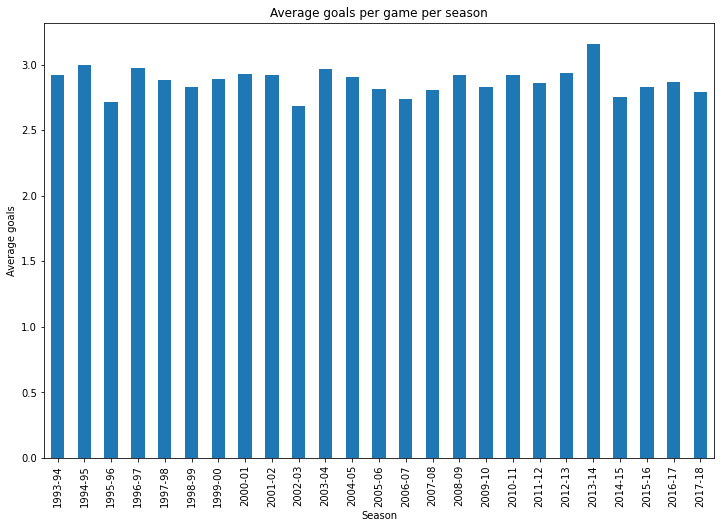

In [7]:
dp = df.groupby('Season')['total_goals'].mean().plot(kind="bar", title="Average goals per game per season", figsize=(12, 8))
dp.set_xlabel("Season")
dp.set_ylabel("Average goals")

In [10]:
#Observation: Average goals per game are roughly the same for every season at roughly 3 goals/game. 

In [8]:
df.drop('total_goals',axis=1,inplace=True)
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
612,D1,11/8/1995,Dortmund,Kaiserslautern,1,1,D,0.0,0.0,D,1995-96
613,D1,11/8/1995,Stuttgart,Uerdingen,0,0,D,0.0,0.0,D,1995-96
614,D1,11/8/1995,Werder Bremen,Dusseldorf,1,1,D,1.0,1.0,D,1995-96
615,D1,12/8/1995,Bayern Munich,Hamburg,3,2,H,1.0,1.0,D,1995-96
616,D1,12/8/1995,Ein Frankfurt,Karlsruhe,2,2,D,1.0,1.0,D,1995-96


Text(0, 0.5, 'Count')

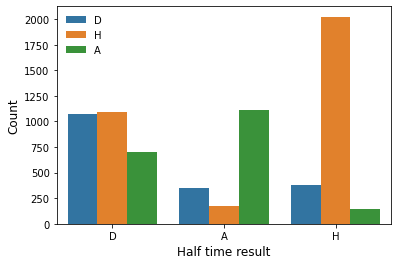

In [12]:
sns.countplot(data=df, x="HTR", hue="FTR")
plt.legend(edgecolor="White", facecolor="White")
plt.xlabel("Half time result", size=12, color="Black")
plt.ylabel("Count", size=12, color="Black")

In [13]:
#H : Home team leading at half time.
#A : Away team leading at half time.
#D : Draw at half time.

#The team leading at half time has a huge chance to go on to win the game. If the game is a draw at half time the home team has 
#the greatest chance to win the game, followed by a draw and the away team has the least chance to win if the game is drawn at 
#half time. 

In [14]:
#Rank the top 10 teams over the  period.

In [9]:
results = df

results.tail()


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
7645,D1,12/5/2018,Hoffenheim,Dortmund,3,1,H,1.0,0.0,H,2017-18
7646,D1,12/5/2018,Leverkusen,Hannover,3,2,H,2.0,0.0,H,2017-18
7647,D1,12/5/2018,Mainz,Werder Bremen,1,2,A,1.0,1.0,D,2017-18
7648,D1,12/5/2018,Schalke 04,Ein Frankfurt,1,0,H,1.0,0.0,H,2017-18
7649,D1,12/5/2018,Wolfsburg,FC Koln,4,1,H,1.0,1.0,D,2017-18


In [10]:
results['H'] = results['HomeTeam']
results['A'] = results['AwayTeam']
cols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Season']

points = pd.melt(results, id_vars = cols, value_vars=['H', 'A'], var_name='Home/Away', value_name='Team')
points['Opponent'] = np.where(points['Team'] == points['HomeTeam'], points['AwayTeam'], points['HomeTeam'])

In [11]:
points_map = {'W': 3, 'D': 1, 'L': 0}

def get_result(score, score_opp):
    if score == score_opp:
        return 'D'
    elif score > score_opp:
        return 'W'
    else:
        return 'L'

In [12]:
points['Goals'] = np.where(points['Team'] == points['HomeTeam'], points['FTHG'], points['FTAG'])
points['Goals_Opp'] = np.where(points['Team'] != points['HomeTeam'], points['FTHG'], points['FTAG'])

points['Result'] = np.vectorize(get_result)(points['Goals'], points['Goals_Opp'])
points['Points'] = points['Result'].map(points_map)

Text(0, 0.5, 'Total points')

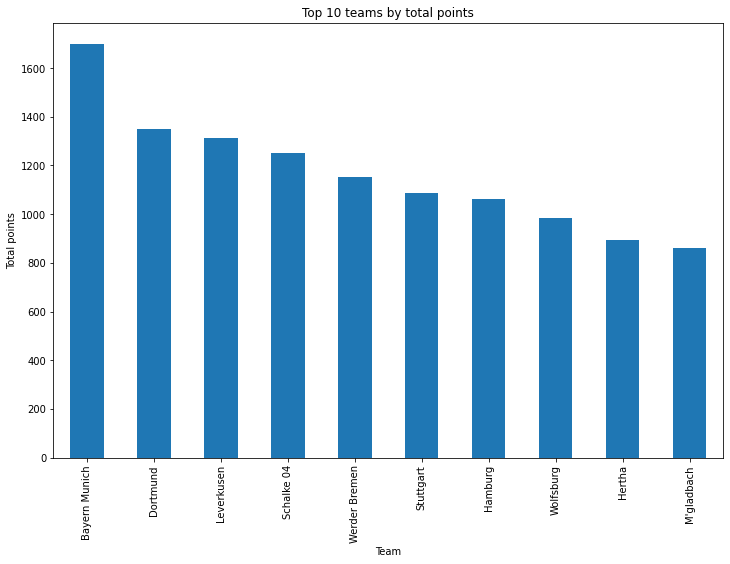

In [13]:
top_teams = points.groupby('Team').sum()['Points'].sort_values(ascending=False)
top_teams = top_teams.head(10) 

dp = top_teams.plot(kind="bar", title="Top 10 teams by total points",  figsize=(12, 8))
dp.set_xlabel("Team")
dp.set_ylabel("Total points")

In [20]:
#Bayern Munich have the most number of total points summed over all of the seasons (3 points for a win and 1 point for a draw).